# <center> Capstone -Sentiment Based Product Recommendation System </center>

#### By - 
### Sharath Chandra Linga (sharathchandra.linga@gmail.com) 

### `Problem statement`: 

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

In order to do this, you planned to build a **sentiment-based product recommendation system**, which includes the following tasks.

*   Data sourcing and sentiment analysis
*   Building a recommendation system
*   Improving the recommendations using the sentiment analysis model
*   Deploying the end-to-end project with a user interface

**What needs to be submitted for the evaluation of the project?**

*   An end-to-end Jupyter Notebook, which consists of the entire code (data cleaning steps, text preprocessing, feature extraction, ML models used to build sentiment analysis models, two recommendation systems and their evaluations, etc.) of the problem statement defined
*   The following deployment files
    *   One 'model.py' file, which should contain only one ML model and only one recommendation system that you have obtained from the previous steps along with the entire code to deploy the end-to-end project using Flask and Heroku
    *   'index.html' file, which includes the HTML code of the user interface
    *   'app.py' file, which is the Flask file to connect the backend ML model with the frontend HTML code
    *   Supported pickle files, which have been generated while pickling the models





# Step 1: `EXPLORATARY DATA ANALYSIS`

Load the data and process the data for clean and assesble data for model and visualizations and understanding the various features of the Data. 

## 1.1 Import Libraries and Dataset

Import Liraries as and when needed will update here

In [1]:
## Import Liraries (As and when required)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import re
import sklearn

#limiting the dislay
pd.set_option('max_columns',300)
pd.set_option('max_rows',100000)

#NLP Libraries
import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
ps=PorterStemmer()
lm=WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')

tf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
from sklearn.model_selection import train_test_split


import sklearn.metrics
#import imblearn
from sklearn.metrics import precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score

from sklearn.naive_bayes import BernoulliNB 

#Word2Vec
import gensim
from gensim.models.word2vec import Word2Vec

# For Deployment ease to use pickle library
import pickle

import imblearn
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# Radom Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
## Local Execution 
#Reading the dataset 
data = pd.read_csv("sample30.csv")

## Google Colab Execution 
#Reading the dataset 
#f = open('/content/gdrive/MyDrive/Colab Notebooks/Capstone/sample30.csv')  
#data = pd.read_csv(f)
data.shape # Verify count of data.

(30000, 15)

## 1.2 Data Cleaning and Processing

Remove unwanted data and adjust the missing data or correct with impute averages etc and some visualizations of data available 

In [3]:
# Print Data to see how data looks like 
data.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
# Checkign the Null Values in percentage terms. 
((data.isnull().sum()/data.shape[0])*100).round(2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

It has bee observed that out of `15` columns - `4` columns has more null or empty data. Lets treat them one by one and also Reviews_userCity and review_userProvince has almost all empty data. and also reviews_didPurchase has more than 45% of data null or empty. By seeing the columns and it stats with the values - `Lets drop these columns` for the better evaluations. 

In [5]:
# Dropping the columns reviews_didPurchase reviews_userCity reviews_userProvince        
data.drop(['reviews_didPurchase','reviews_userCity','reviews_userProvince'],axis=1,inplace=True)

In [6]:
data.shape # should have 12 columns as we dropped 3. 

(30000, 12)

In [7]:
# Checkign the Null Values in percentage terms. 
((data.isnull().sum()/data.shape[0])*100).round(2)

id                     0.00
brand                  0.00
categories             0.00
manufacturer           0.47
name                   0.00
reviews_date           0.15
reviews_doRecommend    8.57
reviews_rating         0.00
reviews_text           0.00
reviews_title          0.63
reviews_username       0.21
user_sentiment         0.00
dtype: float64

In [8]:
# Now lets treat - reviews_doRecommend     
data.reviews_doRecommend.value_counts()


True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

In [9]:
#Based on the values for this reviews_doRecommend filed it has been observed that majority 92% or ~26k of True. Lets impute the missing with True. 
data['reviews_doRecommend'].replace(np.NaN,data['reviews_doRecommend'].value_counts().index[0],inplace=True)

In [10]:
# Checkign the Null Values in percentage terms. 
((data.isnull().sum()/data.shape[0])*100).round(2)

id                     0.00
brand                  0.00
categories             0.00
manufacturer           0.47
name                   0.00
reviews_date           0.15
reviews_doRecommend    0.00
reviews_rating         0.00
reviews_text           0.00
reviews_title          0.63
reviews_username       0.21
user_sentiment         0.00
dtype: float64

In [11]:
#Lets treat now manufacturer           
data.manufacturer.value_counts().head(5)
#It observed that it has very distinct and large no of difrent manufacturers are present. 


Clorox            8546
Test              3325
AmazonUs/CLOO7    2039
L'oreal Paris     1232
Walt Disney       1143
Name: manufacturer, dtype: int64

In [12]:
#lets impute the highest manufacturer value for all the null values as the count are very negligible. 
data.manufacturer.replace(np.NaN,data.manufacturer.value_counts().index[0],inplace=True)

In [13]:
# Checkign the Null Values in percentage terms. 
((data.isnull().sum()/data.shape[0])*100).round(2)

id                     0.00
brand                  0.00
categories             0.00
manufacturer           0.00
name                   0.00
reviews_date           0.15
reviews_doRecommend    0.00
reviews_rating         0.00
reviews_text           0.00
reviews_title          0.63
reviews_username       0.21
user_sentiment         0.00
dtype: float64

In [14]:
#Lets repeat the same for review_data, reviews_title,review_username with the highest of the respective columns'data as the missing values are vry less < 1% 
data.reviews_date.replace(np.NaN,data.reviews_date.value_counts().index[0],inplace=True)
data.reviews_title.replace(np.NaN,data.reviews_title.value_counts().index[0],inplace=True)
data.reviews_username.replace(np.NaN,data.reviews_username.value_counts().index[0],inplace=True)

In [15]:
# Checkign the Null Values in percentage terms. lets check without any roundoffs. 
((data.isnull().sum()/data.shape[0])*100)

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.000000
name                   0.000000
reviews_date           0.000000
reviews_doRecommend    0.000000
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.000000
reviews_username       0.000000
user_sentiment         0.003333
dtype: float64

In [16]:
## Still user_sentiment has a very less null values - lets see what are they 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         30000 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         30000 non-null  object
 6   reviews_doRecommend  30000 non-null  bool  
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_title        30000 non-null  object
 10  reviews_username     30000 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


In [17]:
## Only 1 record has empty value. Good to delete that row as the impact would be very less. 

data.dropna(how='any',axis=0,inplace=True)
data.reset_index(drop=True,inplace=True) #has it deletes the entry - we have to reset the index. 

In [18]:
# Checkign the Null Values in percentage terms. lets check without any roundoffs. 
((data.isnull().sum()/data.shape[0])*100)

id                     0.0
brand                  0.0
categories             0.0
manufacturer           0.0
name                   0.0
reviews_date           0.0
reviews_doRecommend    0.0
reviews_rating         0.0
reviews_text           0.0
reviews_title          0.0
reviews_username       0.0
user_sentiment         0.0
dtype: float64

Now the data has no missing values for all the `12` Columns. Lets check the datatypes too. 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


All the columns has the properly assigned with correct datatypes. So no change required. 

## 1.3 Feature Validations 
Understand each column and come up with visulaization how they represent the data and how it can be used for the Sentiment Analysis. 



In [20]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


In [21]:
# Common Utility Method for Bar/plots for Visualization 

def show_in_bar_plot(colName):
    plt.figure(figsize=(8,8))
    data[colName].value_counts(normalize=True).plot(kind="bar")
    plt.title("Category's Percentage in the {} Feature")
    plt.xlabel(colName)
    plt.ylabel('Percentage (%)')
    plt.show()

In [22]:
# We have total 12 Columns - and lets analyze some important things  

# Lets start with ID and Name as both sounds similar and lets check whether they both have the values unique or not.

print('ID Counts ', data.id.nunique())
print('Name Counts ', data.name.nunique())

ID Counts  271
Name Counts  271


In [23]:
# observed that they both have the same unique values so we can assume and 
#now lets see the `Rating categories` i.e. Reviews_rating so that we can see how many are there and how they have values in each category 
(data.reviews_rating.value_counts(normalize=True)*100).round(2)

5    69.44
4    20.07
1     4.61
3     4.48
2     1.40
Name: reviews_rating, dtype: float64

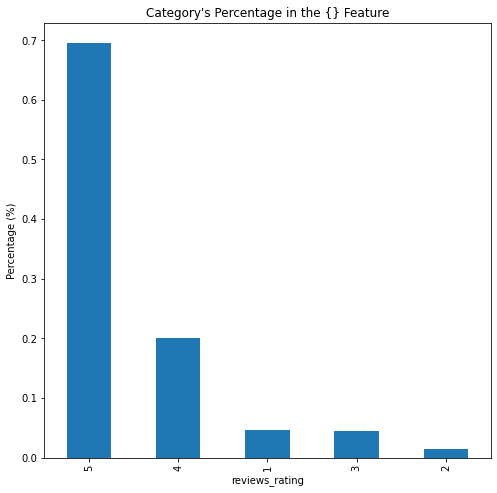

In [24]:
show_in_bar_plot('reviews_rating')

Based on above visualizations - it is observed that Rating 5 is being given for most of the observations. Its upto 70% 

now lets see how many total brands we have 

In [25]:
len(data.brand.unique())

214

we have over 214 unique brands in total 
lets visualize the top brands. 

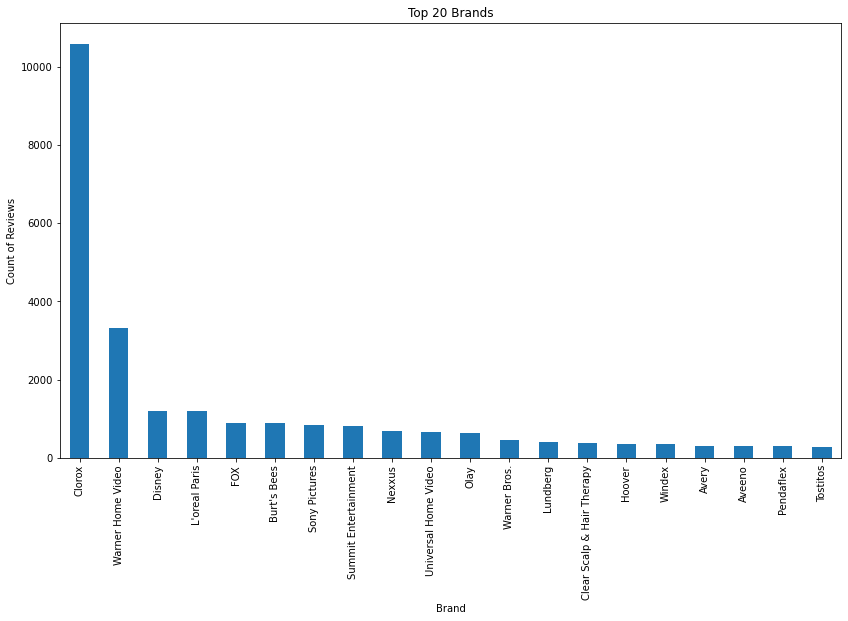

In [26]:
#since we have to send only top 20 we will use inline visualization for graph / bar
plt.figure(figsize=(14,8))
plt.title('Top 20 Brands')
data.brand.value_counts()[:20].plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count of Reviews')
plt.show()

In [27]:
#Lets see the same for Categories. 
len(data.categories.unique())

270

In [28]:
data.categories.value_counts().head(5)

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Cleaners,Bath & 

It has been observed that these top 5 categories has large set of names seperated by comma - so lets go with the same and later will see if this can be used  in sentiment or not. 

In [29]:
#Now lets amalyze manufacturers - 

data.manufacturer.value_counts()

Clorox                                  8687
Test                                    3325
AmazonUs/CLOO7                          2039
L'oreal Paris                           1232
Walt Disney                             1142
Burt's Bees                              873
SONY CORP                                845
Twentieth Century Fox                    757
P&G                                      730
Nexxus Beauty Products                   693
Summit Entertainment                     672
Universal                                668
Lundberg Family Farms                    412
Clear                                    372
Hoover                                   362
Windex                                   348
Avery Dennison                           313
Aveeno Baby                              313
Esselte Corporation                      310
Tostitos                                 265
1200                                     264
Frito-Lay                                258
TIME WARNE

Top 5 manufacturers are 
*   Clorox
*   Test
*   AmazonUs/CLOO7
*   L'oreal Paris
*   Walt Disney

In [30]:
# now lets check for dates - before checking the dates - its good to have the Years which can extract from the date and yarly would be great to see the results. 

# Creating a new column year for ease usage. 
data['year']=  [i.split('-') [0] for i in data.reviews_date]

In [31]:
data['year'].value_counts().index # to show only the year values 


Index(['2014', '2015', '2016', '2012', '2017', '2013', '2009', '2011', '2010',
       '2008', '2007', ' hooks slide or swivel into any desired position."',
       '2018'],
      dtype='object')

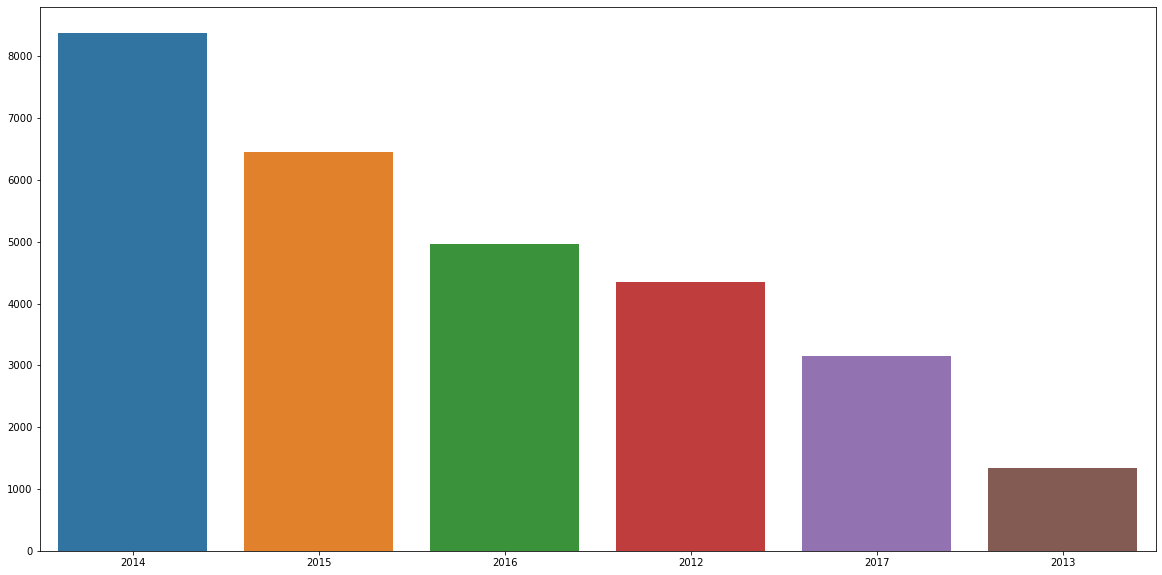

In [32]:
# last 6 years of data
plt.figure(figsize=(20,10))
sns.barplot (data[ 'year'].value_counts ().index[:6], data[ 'year'].value_counts().values [:6])
plt.show()

Year 2014 the highest given rating year and later years it got decreased. 


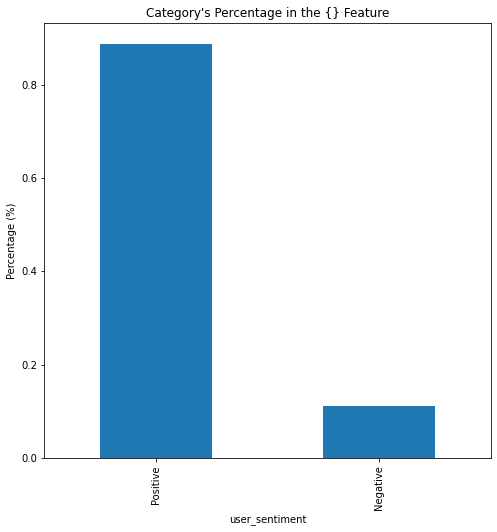

In [33]:
show_in_bar_plot('user_sentiment')

Overall we have above 80% of positive rating. 

In [34]:
#Lets check how many total users are there unique 

len(data['reviews_username'].value_counts())

24914

we do have a lot of unique users given the rating which is good sing for the sentiment analysis as we can consider broader audience perspective. 

Based on above analysis - found out that - we do have 3 important columns i.e. `reviews_title`, `reviews_text` and `usersentiment` and also the remaining columns we use as when needed. Lets proceed for some Text processing. 

# Step 2:  `TEXT PRE-PROCESSING`

We use text preprocessing and prepare for model ready data 

## 2.1 Text processing using NLTK approaches. 
Fix review column text data 

So observed that we do have reviews title and reviews text which has splitted into two columns - lets concatenate it and add it to new column review and drop the rest 2 

In [35]:
data['review'] = data['reviews_title']+'_'+data['reviews_text']  #Combined with _ now.
data.drop(['reviews_title','reviews_text'], axis=1,inplace=True)  #dropping the columns as we combined/concatenated. 

In [36]:
data.info() # lets see what all we have now 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_username     29999 non-null  object
 9   user_sentiment       29999 non-null  object
 10  year                 29999 non-null  object
 11  review               29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


In [37]:
# user_sentiment is having positive or negative - lets go with 0 negative n 1 for positive 
data.user_sentiment =data.user_sentiment.replace({'Positive':1,'Negative':0})


In [38]:
data.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,year,review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,joshua,1,2012,Just Awesome_i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,dorothy w,1,2017,Good_Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,dorothy w,1,2017,Good_Good flavor.


In [39]:
#Lets create a copy of Data so far has - or Clone a copy of data and keep it in - data2 
data2 = data[:]  # : mean all data 

So lets process the actual text and be prepare the proper data for sentiment analysis for that we have to follow the below various steps: 


1.   Stopword Removal and Puntuation Removal
2.   Stemming and Lemmatization
3.   convert the text to tokens using one of the approaches we have (bag of words, tfidf etc, word2vec etc)
 



In [40]:
# Lets start with Stopword removal and correcting the punctuation - will go by english language

processed_reviews = []

for review_sentence in data.review:
  # lets lower all the review string 
  review_sentence = review_sentence.lower()

  # now removing the extra regex from the sentence - we already concatenated with _ but thats not required. 
  review_sentence = re.sub('[^a-zA-Z0-9]',' ',review_sentence)

  # join the sentences 
  review_sentence=review_sentence.split()
  review_sentence=' '.join(review_sentence)  # again for splitting with standard "  "
  review_sentence=review_sentence.split()

  # Now stop word along with Lemmatization 
  review_sentence=[lm.lemmatize(word) for word in review_sentence if word not in set(stopwords.words('english'))]

  #add to the list of processed reviews 
  processed_reviews.append(' '.join(review_sentence))




In [41]:
processed_reviews


['awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy',
 'good good flavor review collected part promotion',
 'good good flavor',
 'disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquid vaseline difficult clean pleasant especially since lacked captivating sensation expecting disappointed paid much lube use could use normal personal lubricant 1 le money 2 le mess',
 'irritation husband bought gel u gel caused irritation felt like burning skin recommend gel',
 'worth boyfriend bought spice thing bedroom highly disappointed product bought one absolutely love ky mine thought would similar affect absolutely nothing buy',
 'disappointing bought earlier today excited check based product description expecting something like regular ky fan expected left 

In [42]:
data['processed_reviews'] = processed_reviews
data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,year,review,processed_reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,joshua,1,2012,Just Awesome_i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,dorothy w,1,2017,Good_Good flavor. This review was collected as...,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,dorothy w,1,2017,Good_Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,rebecca,0,2016,Disappointed_I read through the reviews on her...,disappointed read review looking buying one co...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,walker557,0,2016,Irritation_My husband bought this gel for us. ...,irritation husband bought gel u gel caused irr...


So far we have done some basic processing of the text using nlp techniques to have processed reviews. Now lets see how many words in each review there. and so that we can see. Lets use quantile approcah to see how many words are there in each review. 



In [43]:
#using numpy quantile - lets see 
processed_reviews_word_count = []
for i in processed_reviews: 
    processed_reviews_word_count.append((len(i.split())))  # adding the length of the words to a new list 
np.quantile(processed_reviews_word_count,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,0.995,0.998,0.999,1])  # 0 to 1 with various quantiles. 

array([  1.   ,   8.   ,  10.   ,  11.   ,  13.   ,  15.   ,  17.   ,
        21.   ,  26.   ,  36.   ,  48.   ,  69.   ,  86.   , 109.   ,
       140.   , 173.008, 554.   ])

Using above quantiles - observed that - at 98% quantile we have around 140 words and 173 in 99th quantile - so lets go with a standard valu ein between these 150 and will remove the reviews which are more than 150 words. 

In [44]:
totalReviews = len(data.processed_reviews)
review_index_with_150_words = []

for i,j in zip(range(totalReviews + 1) ,  data.processed_reviews):
    if(len(j.split())>150):  
        if(j == (data.processed_reviews[i])):
            review_index_with_150_words.append(i)    

print('Total Reviews Count with more than 150 words', len(review_index_with_150_words))

Total Reviews Count with more than 150 words 48


In [45]:
print(' what is the % of more than 150 words out of dataset ')
(len(review_index_with_150_words)/data.shape[0])*100



 what is the % of more than 150 words out of dataset 


0.16000533351111704

It is concluded that we have way negligible number of reviews which is having more than 150 words in it i.e. 0.16% - so lets drop those rows. 


In [46]:
data.drop(review_index_with_150_words,inplace=True)
data.reset_index(inplace=True) #reset as after delete indexs will be not in correct order 

In [47]:
data.shape

(29951, 14)

So far we have deleted 1 + 48 Records from the given Dataset as per the analysis and understandings how data is there in that 

In [48]:
# clone the so far data 
data2 = data[:]

## 2.2 Correcting the Oversampling

In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

In [49]:
# lets create a dependent variable i.e. reviews which is processed and user sentimetn as x and y to create the model 

x= data.processed_reviews
y= data.user_sentiment 



In [50]:
# lets see how data looks like 
print(x.head(3)) 
print(y.head(3))


0    awesome love album good hip hop side current p...
1     good good flavor review collected part promotion
2                                     good good flavor
Name: processed_reviews, dtype: object
0    1
1    1
2    1
Name: user_sentiment, dtype: int64


Now we have to use either TFIDF / Bagofwords / CountVectorization 

Ref: https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/ 

First Lets go with TF-IDF and see 

In [51]:
# TF-IDF: Term frequency - Inverse document frequency 
# TFIDF works by proportionally increasing the number of times a word appears in the document but is counterbalanced by the number of documents in which it is present

x=tf.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
unique_random_state_for_book = 39

In [53]:
# create variables with with 70+30 size train and test splits. 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=unique_random_state_for_book,stratify=y) 

In [54]:
print('x Train', x_train.shape, 'x Test', x_test.shape)
print('Y Train', x_train.shape, 'Y Test', x_test.shape)

x Train (20965, 5000) x Test (8986, 5000)
Y Train (20965, 5000) Y Test (8986, 5000)


In [55]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

1    0.887603
0    0.112397
Name: user_sentiment, dtype: float64

So the target variable has the very highly imbalanced where 89 and 11 % in train n test  so lets treat this Class Imbalance 

`**Oversampling**` is capable of improving resolution and signal-to-noise ratio, and can be helpful in avoiding aliasing and phase distortion by relaxing anti-aliasing filter performance requirements

Some techniques to handle the oversampling 
1.   Random Sampling
2.   SMOTE 
3.   ADASYN

most popular and perhaps most successful oversampling method is SMOTE; that is an acronym for Synthetic Minority Oversampling Technique

Ref: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 



In [56]:
# API Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html 
smt = SMOTE(0.5,random_state=unique_random_state_for_book)  
# 0.5 for the majority of the data has the values same as minority 
x_train_SMOTE, y_train_SMOTE = smt.fit_resample(x_train, y_train)



In [57]:
print(x_train_SMOTE.shape, '---', y_train_SMOTE.shape)
print('Actual Y Train stats')
print(y_train.value_counts())
print('After Oversampling the Y Train Counts')
print(y_train_SMOTE.value_counts())

(27912, 5000) --- (27912,)
Actual Y Train stats
1    18608
0     2357
Name: user_sentiment, dtype: int64
After Oversampling the Y Train Counts
1    18608
0     9304
Name: user_sentiment, dtype: int64


Now we have the good samples with corrected class imbalance values. 

# Step 3: `TRAINING A CLASSIFICATION MODEL`
You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes

First Lets go with TF-IDF processed and 3 models from the above 4 regression model. 


## 3.1 Logistic Regression
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. ... Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category

In [58]:
lr=LogisticRegression()

In [59]:
# call fit fuction with oversampled dataset 
lr.fit(x_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [60]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
print('Accuracy for Logistic Regression', accuracy_score(y_test, y_pred))

Accuracy for Logistic Regression 0.9021811707099934


`90%` for Logistic Regression 

In [62]:
print(confusion_matrix(y_test,y_pred))


[[ 652  358]
 [ 521 7455]]


In [63]:
print(classification_report(y_test, y_pred))
print("precision score",precision_score(y_test,y_pred))
print("Recall score",recall_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60      1010
           1       0.95      0.93      0.94      7976

    accuracy                           0.90      8986
   macro avg       0.76      0.79      0.77      8986
weighted avg       0.91      0.90      0.91      8986

precision score 0.9541789325483169
Recall score 0.934679037111334


Conclusion: With abvoe various metrics - it is obseved that we have `90%` accuracy with Logistic Regression. Lets check the other model Random Forest 

## 3.2 Random Forest 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. 
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset

In [67]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Ref: https://machinelearningmastery.com/random-forest-ensemble-in-python/ example 
rc=RandomForestClassifier(random_state=unique_random_state_for_book,n_jobs=-1) #n_jobsint The number of jobs to run in parallel.  -1 means using all processors.



In [68]:
# since we using gridsearchcv - lets explore https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 
# and https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/ 

params = {'max_depth': [1, 2, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4], 'n_estimators': [10, 30, 50, 100, 200,400]
}



In [69]:
grid_search_model = GridSearchCV(estimator=rc, param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
# 4 fold cross validation  (marking it as 1 for local testing )
#1. estimator – A scikit-learn model
#2. param_grid – A dictionary with parameter names as keys and lists of parameter values.
#3. scoring – The performance measure. For example, ‘r2’ for regression models, ‘precision’ for classification models.
#4. njobs – all processes at parallel running 

In [117]:
# to print time 

grid_search_model.fit(x_train_SMOTE,y_train_SMOTE)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=39),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [118]:
rf_best = grid_search_model.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=5,
                       n_estimators=10, n_jobs=-1, random_state=39)

In [119]:
rc=RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=10,n_estimators=10, n_jobs=-1, random_state=unique_random_state_for_book)
rc

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=10,
                       n_estimators=10, n_jobs=-1, random_state=39)

In [120]:
rc.fit(x_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=10,
                       n_estimators=10, n_jobs=-1, random_state=39)

In [121]:
y_pred=rc.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [122]:
print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("precision score: ",precision_score(y_test,y_pred))
print("Recall score: ",recall_score(y_test,y_pred))

Accuracy:  0.8879367905630982
[[   4 1006]
 [   1 7975]]
              precision    recall  f1-score   support

           0       0.80      0.00      0.01      1010
           1       0.89      1.00      0.94      7976

    accuracy                           0.89      8986
   macro avg       0.84      0.50      0.47      8986
weighted avg       0.88      0.89      0.84      8986

precision score:  0.8879857476895668
Recall score:  0.9998746238716149


Conclusion: With abvoe various metrics - it is obseved that we have `89`% accuracy with Random Forest Regression. Lets check the other model Navie Bias - XGBoost has issues with deployment as per discussion over class.

## 3.3 Naive Bayes

The Naive Bayes is a classification algorithm that is suitable for binary and multiclass classification. Naïve Bayes performs well in cases of categorical input variables compared to numerical **variables**

In [72]:
#Like MultinomialNB, this classifier is suitable for discrete data.
nbc=BernoulliNB()

In [73]:
nbc.fit(x_train_SMOTE,y_train_SMOTE)

BernoulliNB()

In [74]:
y_pred=nbc.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [75]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("precision score",precision_score(y_test,y_pred))
print("Recall score",recall_score(y_test,y_pred))


Accuracy:  0.8474293345203651
[[ 397  613]
 [ 758 7218]]
              precision    recall  f1-score   support

           0       0.34      0.39      0.37      1010
           1       0.92      0.90      0.91      7976

    accuracy                           0.85      8986
   macro avg       0.63      0.65      0.64      8986
weighted avg       0.86      0.85      0.85      8986

precision score 0.9217213638104967
Recall score 0.9049648946840522


Conclusion: With abvoe various metrics - it is obseved that we have `85`% accuracy with Naive Bias Regression. 

So using TF-IDF oversampled using SMOTE analysis  - we have found the below Accuracy Levels for 3 Regression Models. 

1.   Logistic Regression: `90%`
2.   Random Forest: `89%`
3.   Naive Bias: `85%`

So here in this one we have Logistic Regression has the highest accuracy with TF-IDF. 

### Lets go with TF-IDF Model with Logistic Regression which has the better metrics for the model. 

# Step 4: `BUILDING A RECOMMENDATION SYSTEM`

you can use the following types of recommendation systems.

 

1. User-based recommendation system

2. Item-based recommendation system

##4.1.1 User Based Recommendation System 


In [76]:
# Create a clone copy 
data_ubr = data[:] # User Based Recommendation  UBR
data_ubr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29951 entries, 0 to 29950
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                29951 non-null  int64 
 1   id                   29951 non-null  object
 2   brand                29951 non-null  object
 3   categories           29951 non-null  object
 4   manufacturer         29951 non-null  object
 5   name                 29951 non-null  object
 6   reviews_date         29951 non-null  object
 7   reviews_doRecommend  29951 non-null  bool  
 8   reviews_rating       29951 non-null  int64 
 9   reviews_username     29951 non-null  object
 10  user_sentiment       29951 non-null  int64 
 11  year                 29951 non-null  object
 12  review               29951 non-null  object
 13  processed_reviews    29951 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 3.0+ MB


In [77]:
# For Recommendations Split data into train and test 
recommend_train, recommend_test = train_test_split(data_ubr, test_size=0.3, random_state=unique_random_state_for_book)


In [78]:
print("Recommndation training data:",recommend_train.shape)
print("Recommndation testing data: ",recommend_test.shape)

Recommndation training data: (20965, 14)
Recommndation testing data:  (8986, 14)


In [79]:
pickle.dump(recommend_train,open('traindata.pkl','wb'))

As we have seen there are almost 14 columns or data features there and we have created the model with review text and sentiment - and now for user based recommendation lets go with relative columns ie. `user name, rating and product name`

In [80]:
#creating pivot - with above columns. 
df_pivot = recommend_train.pivot_table(index='reviews_username',values='reviews_rating',columns='name').fillna(0)
df_pivot.head(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Spor

Lets gathers the products which were not rated by the user. 



In [81]:
def not_rated_products_user(x):
  if x>=1:
      return 0
  else:
      return 1

In [82]:
recommendtrain_2 = recommend_train.copy()
recommendtrain_2['reviews_rating'] = recommendtrain_2['reviews_rating'].apply(not_rated_products_user)

In [83]:
recommendtrain_2 = recommendtrain_2.pivot_table(index='reviews_username',values='reviews_rating',columns='name').fillna(1)


In [84]:
recommendtrain_2.head(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Spor

Cosine similarity measures the similarity between two vectors of an inner product space

Adjusted cosine similarity measure is a modified form of vector-based similarity where we take into the fact that different users have different ratings schemes

In [85]:
#adjusted cosine similarity 
from sklearn.metrics.pairwise import pairwise_distances
usercorrelation = 1 - pairwise_distances(df_pivot, metric='cosine')
usercorrelation[np.isnan(usercorrelation)] = 0
print(usercorrelation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [86]:
#Similarity matrix 
usercorrelation[usercorrelation<0]=0
usercorrelation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [87]:
user_predicatd_ratings = np.dot(usercorrelation, df_pivot.fillna(0))
user_predicatd_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  4.83464687,
         2.52288531,  1.22474487],
       [ 0.        , 19.64446882,  0.        , ..., 23.30337171,
         2.86606064,  0.48867778],
       [ 0.        , 19.64446882,  0.        , ..., 23.30337171,
         2.86606064,  0.48867778],
       ...,
       [ 0.        , 11.77568188,  0.        , ...,  7.66106916,
         3.37781052,  0.        ],
       [ 0.        , 11.77568188,  0.        , ...,  7.66106916,
         3.37781052,  0.        ],
       [ 0.        , 11.77568188,  0.        , ...,  7.66106916,
         3.37781052,  0.        ]])

Since we are looking for only products not rated by user lets ignore the rest 

In [88]:
final_ratings_user = np.multiply(user_predicatd_ratings,recommendtrain_2)
final_ratings_user.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Spor

## 4.1.2 Finding the Top5 User Recos 

In [89]:
user_name_input = input("Please enter Username: ")
print(user_name_input)

Please enter Username: mike
mike


In [90]:
pickle.dump(final_ratings_user,open('final_ratings.pkl','wb'))

## 4.1.3 Recommendations for the Given Username

In [91]:
top_20_recommendations_user = final_ratings_user.loc[user_name_input].sort_values(ascending=False)[0:20]
print('Top 20 Recommendations for User ', user_name_input)
top_20_recommendations_user

Top 20 Recommendations for User  mike


name
The Resident Evil Collection 5 Discs (blu-Ray)                                     52.682054
Red (special Edition) (dvdvideo)                                                   28.431643
Tostitos Bite Size Tortilla Chips                                                  25.017898
Burt's Bees Lip Shimmer, Raisin                                                    18.265518
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    16.586389
Coty Airspun Face Powder, Translucent Extra Coverage                               13.949239
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              13.920875
100:Complete First Season (blu-Ray)                                                11.587604
Hormel Chili, No Beans                                                             11.348763
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                       9.494905
Bisquick Original Pancake And Baking Mix - 40oz                  

`**`Conclusion - thats the user to user recommendation where we followed cosine similarity and dot products to fetch the recommendations. **

## 4.2.1 Item Based User Recommendation System

In [92]:
# Create a clone copy 
data_ibr = data[:] # User Based Recommendation  UBR
data_ibr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29951 entries, 0 to 29950
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                29951 non-null  int64 
 1   id                   29951 non-null  object
 2   brand                29951 non-null  object
 3   categories           29951 non-null  object
 4   manufacturer         29951 non-null  object
 5   name                 29951 non-null  object
 6   reviews_date         29951 non-null  object
 7   reviews_doRecommend  29951 non-null  bool  
 8   reviews_rating       29951 non-null  int64 
 9   reviews_username     29951 non-null  object
 10  user_sentiment       29951 non-null  int64 
 11  year                 29951 non-null  object
 12  review               29951 non-null  object
 13  processed_reviews    29951 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 3.0+ MB


In [93]:
df_itembased_pivot = recommend_train.pivot_table(index='reviews_username',values='reviews_rating',columns='name').T
df_itembased_pivot.head()

reviews_username,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123charlie,123rs,123soccermom,123too,12cass12,12gage,132457,13dani,13ld,13ram,1421nikki,148maine,15425shopper,170361eggs,1753,18612,1863philly,1943,1950rmm,1970,1979edes,1992firebirdgirl,1awesome1,1buzymom,1cadet,1chynna,1cocoafan,1derpet1,1disappoint,1friendlycat,1glenn,1gra,1gussy,1happymom,1hotmama,1izzy1,1jc1,1jodie,1kindword,1movielover2,1nikki31t,1officegal,1okc2thunder3up4,1olaygal,1pleasedclient,1scooby1,1stcavdivision,1stlady,1sttimemama,1sungirl,1texasmom,1tomg,1vgarcia,1wildbill2l,1witch,2011mom2b,2013bestbuyer,2014bestbuys,2015mom,2016,2016home,2016parker10,2062351337,20crafter16,210tundra,21honey,232323,23jen,2455,2532674594,25happyshopper,262jennifer,2689,2827,28green,295259,2athome,2bgreen,2big,2busy4u,2choclabs,2clean4me,2cutekids,2dobies,2ds4es14,2esinapod,2forhokies,2go4savings,2iceskates,2low4zero,2shoes,2total,2w0cat5z,2xmom,3276teev,370gt,37f5p,38redsox,3babiesat41,3bear,3card,3dcav,3dknights,3dmoviewatcher,3dpenguin,3dpic,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,3skyyblue,4 rooms 1 dog lotsa fur,4112,45177ss,4795181377,49ersfor6,4bukfam,4cloroxl,4djs,4gis1975,4momma88,4my5goldens,4parman,4shop,4stew57,4theloveofclorox,4wipes,500mpl,50cal,5150seriousshopper5150,530germkiller,54867906,57susie,5alarm,...,yata32,yayatex,yayawomack,yazh,yazt,yazzmiin,ybeard,ycyc,ydteoo,yeag350,yeapmsb,yeeya,yen0102,yes22,yesseniaw22,yessi,yessi819,yessidoll23,yesss,yexzenica,yeya,yeyo,yglesias99,ygtz,yharkins,ymdunn,ymontes923,yoadrian,yoamomovies,yogagirl,yogamom,yogip,yogore,yohnie1,yojamey,yoko76,yolandas,yoli1987,yoli36,yolo,yolonda24,yoly,yoma,yonino,yooper,yopack,yoperla,yorissa,yorkie6,yorkielvr,yorkster88,yosh,yoski,yosuerte,youjon,youknowhowitgoes,youknowit459,youlooksolovely,younggrannie62,yourmom,youronereviewer,youthfulone,yoyo1245,yozer29,ypryor,yram,yshan,ythelastman89,yttric,yucky111,yummy,yunji,yvonne,yyz2112123,yzkgsx,z12345,z33pisces,zabdelra,zach,zacharymcneill,zacharysaunt,zachsmom,zaibo,zak,zak08,zakkwylde29,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara0215,zara07,zarrahsmommy,zaskar,zaza,zburt5,zebras,zebrastrong,zee74,zeek,zeeleader,zenanuts,zenmon,zeramm,zero,zeroonec,zfem2,zhio,zhynellebb,zibber23,zillafan,zillanator,zimmeyb,zinnian,zipflip,zipp,zipper,zippity,zippy,zkondrk,zman69,zmom,znxfyt,zod10,zodness,zoeellasca,zoey,zoeyny,zokhid,zombie,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zoney86,zoso60,zotox,zout22389,zpalma,zsarah,zsazsa,zt313,zubb,zwithanx,zxcsdfd,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [94]:
# Adjusting the cosine for the nromalization 
normalizedMean  = np.nanmean(df_itembased_pivot, axis=1) # on column1 
final_df_itembased_pivot = (df_itembased_pivot.T-normalizedMean).T

In [95]:
final_df_itembased_pivot.head(3)

reviews_username,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123charlie,123rs,123soccermom,123too,12cass12,12gage,132457,13dani,13ld,13ram,1421nikki,148maine,15425shopper,170361eggs,1753,18612,1863philly,1943,1950rmm,1970,1979edes,1992firebirdgirl,1awesome1,1buzymom,1cadet,1chynna,1cocoafan,1derpet1,1disappoint,1friendlycat,1glenn,1gra,1gussy,1happymom,1hotmama,1izzy1,1jc1,1jodie,1kindword,1movielover2,1nikki31t,1officegal,1okc2thunder3up4,1olaygal,1pleasedclient,1scooby1,1stcavdivision,1stlady,1sttimemama,1sungirl,1texasmom,1tomg,1vgarcia,1wildbill2l,1witch,2011mom2b,2013bestbuyer,2014bestbuys,2015mom,2016,2016home,2016parker10,2062351337,20crafter16,210tundra,21honey,232323,23jen,2455,2532674594,25happyshopper,262jennifer,2689,2827,28green,295259,2athome,2bgreen,2big,2busy4u,2choclabs,2clean4me,2cutekids,2dobies,2ds4es14,2esinapod,2forhokies,2go4savings,2iceskates,2low4zero,2shoes,2total,2w0cat5z,2xmom,3276teev,370gt,37f5p,38redsox,3babiesat41,3bear,3card,3dcav,3dknights,3dmoviewatcher,3dpenguin,3dpic,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,3skyyblue,4 rooms 1 dog lotsa fur,4112,45177ss,4795181377,49ersfor6,4bukfam,4cloroxl,4djs,4gis1975,4momma88,4my5goldens,4parman,4shop,4stew57,4theloveofclorox,4wipes,500mpl,50cal,5150seriousshopper5150,530germkiller,54867906,57susie,5alarm,...,yata32,yayatex,yayawomack,yazh,yazt,yazzmiin,ybeard,ycyc,ydteoo,yeag350,yeapmsb,yeeya,yen0102,yes22,yesseniaw22,yessi,yessi819,yessidoll23,yesss,yexzenica,yeya,yeyo,yglesias99,ygtz,yharkins,ymdunn,ymontes923,yoadrian,yoamomovies,yogagirl,yogamom,yogip,yogore,yohnie1,yojamey,yoko76,yolandas,yoli1987,yoli36,yolo,yolonda24,yoly,yoma,yonino,yooper,yopack,yoperla,yorissa,yorkie6,yorkielvr,yorkster88,yosh,yoski,yosuerte,youjon,youknowhowitgoes,youknowit459,youlooksolovely,younggrannie62,yourmom,youronereviewer,youthfulone,yoyo1245,yozer29,ypryor,yram,yshan,ythelastman89,yttric,yucky111,yummy,yunji,yvonne,yyz2112123,yzkgsx,z12345,z33pisces,zabdelra,zach,zacharymcneill,zacharysaunt,zachsmom,zaibo,zak,zak08,zakkwylde29,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara0215,zara07,zarrahsmommy,zaskar,zaza,zburt5,zebras,zebrastrong,zee74,zeek,zeeleader,zenanuts,zenmon,zeramm,zero,zeroonec,zfem2,zhio,zhynellebb,zibber23,zillafan,zillanator,zimmeyb,zinnian,zipflip,zipp,zipper,zippity,zippy,zkondrk,zman69,zmom,znxfyt,zod10,zodness,zoeellasca,zoey,zoeyny,zokhid,zombie,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zoney86,zoso60,zotox,zout22389,zpalma,zsarah,zsazsa,zt313,zubb,zwithanx,zxcsdfd,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Now we jave adjusted the cosine on the items that has been reviewed - lets check the Item Simialrity Matrix 

In [96]:
item_corr_itembased = 1 - pairwise_distances(final_df_itembased_pivot.fillna(0), metric='cosine')
item_corr_itembased[np.isnan(item_corr_itembased)] = 0
print(item_corr_itembased)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00469218  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00469218  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


we need only values where greater than 0 so that we can get the positive ones. 

In [97]:
item_corr_itembased[item_corr_itembased<0]=0
item_corr_itembased

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## 4.2.2 Item Prediction

In [98]:
#check  the shapes for correct dot product 
print(final_df_itembased_pivot.shape)
print(item_corr_itembased.shape)

(248, 18258)
(248, 248)


In [99]:
#Now we have to do the dot product with the above correlation to get the matrix 

item_prediction_ratings = np.dot((final_df_itembased_pivot.fillna(0).T),item_corr_itembased)
item_prediction_ratings

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.56452507e-03, -1.61592874e-03, -4.01585754e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.98257988e-04, -4.07212987e-04, -1.01199347e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.18947366e-04,  6.64227438e-05,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.18947366e-04,  6.64227438e-05,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.34279811e-04, -2.98353231e-04,  0.00000000e+00]])

In [100]:
#check  the shapes for correct dot product 
print(item_prediction_ratings.shape)
print(recommendtrain_2.shape)

(18258, 248)
(18258, 248)


In [101]:
#Now final rating for items with products not rated by users. 
final_item_item_ratings = np.multiply(item_prediction_ratings,recommendtrain_2)
final_item_item_ratings.head(3)


name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Spor

## 4.2.3 Finding the `Top 5` Recos for Given User

In [102]:
user_name_input = input("Please enter Username: ")
print(user_name_input)

Please enter Username: mike
mike


In [103]:
top_20_recommendations_item = final_item_item_ratings.loc[user_name_input].sort_values(ascending=False)[0:20]
print('Top 20 Recommendations for User ', user_name_input)
top_20_recommendations_item

Top 20 Recommendations for User  mike


name
Progresso Traditional Chicken Tuscany Soup                                         0.128664
Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz                        0.086670
Suave Professionals Hair Conditioner, Sleek                                        0.066007
Creme Of Nature Intensive Conditioning Treatment, 32                               0.046495
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              0.043438
Mill Creek Aloe Vera & Paba Lotion                                                 0.036724
Hawaiian Punch Berry Limeade Blast Juice                                           0.024918
Chex Muddy Buddies Brownie Supreme Snack Mix                                       0.019735
L'oreal Paris Colour Caresse Wet Shine Stain, Pink Resistance                      0.011727
Tostitos Bite Size Tortilla Chips                                                  0.011363
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/

`**`Conclusion - thats the item to item recommendation where we followed cosine similarity and dot products to fetch the recommendations. **

# Step5 : `FINE TUNING THE RECOMMEDNATIONS BASED ON THE USER SENTIMENT`

Predicted the sentiment (positive or negative) of all the reviews in the train data set of the top 20 recommended products for a user. For each of the 20 products recommended, found the percentage of positive sentiments for all the reviews of each product. Filtered out the top 5 products with the highest percentage of positive reviews

In [104]:
# top 20 user - user recommendations: for Mike 
top_20_recommendations_user

name
The Resident Evil Collection 5 Discs (blu-Ray)                                     52.682054
Red (special Edition) (dvdvideo)                                                   28.431643
Tostitos Bite Size Tortilla Chips                                                  25.017898
Burt's Bees Lip Shimmer, Raisin                                                    18.265518
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    16.586389
Coty Airspun Face Powder, Translucent Extra Coverage                               13.949239
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              13.920875
100:Complete First Season (blu-Ray)                                                11.587604
Hormel Chili, No Beans                                                             11.348763
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                       9.494905
Bisquick Original Pancake And Baking Mix - 40oz                  

In [105]:
# top 20 item - item recommendations: For Mike username 
top_20_recommendations_item

name
Progresso Traditional Chicken Tuscany Soup                                         0.128664
Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz                        0.086670
Suave Professionals Hair Conditioner, Sleek                                        0.066007
Creme Of Nature Intensive Conditioning Treatment, 32                               0.046495
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              0.043438
Mill Creek Aloe Vera & Paba Lotion                                                 0.036724
Hawaiian Punch Berry Limeade Blast Juice                                           0.024918
Chex Muddy Buddies Brownie Supreme Snack Mix                                       0.019735
L'oreal Paris Colour Caresse Wet Shine Stain, Pink Resistance                      0.011727
Tostitos Bite Size Tortilla Chips                                                  0.011363
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/

Now lets filiter among these based on the `positive` Reviews - represent top 5 recos . 

In [106]:
# lets create the dataframes with above results for both u-u and i-i based results. 
user_recos = {'Product_Name': top_20_recommendations_user.index, 'Recommendation': top_20_recommendations_user.values}
item_recos = {'Product_Name': top_20_recommendations_item.index, 'Recommendation': top_20_recommendations_item.values}

In [107]:
# converting the above list to dataframes 
user_recos_df=pd.DataFrame(user_recos,index=range(0,20))
user_recos_df

,Product_Name,Recommendation
0,The Resident Evil Collection 5 Discs (blu-Ray),52.682054
1,Red (special Edition) (dvdvideo),28.431643
2,Tostitos Bite Size Tortilla Chips,25.017898
3,"Burt's Bees Lip Shimmer, Raisin",18.265518
4,"Pendaflex174 Divide It Up File Folder, Multi S...",16.586389
5,"Coty Airspun Face Powder, Translucent Extra Co...",13.949239
6,Windex Original Glass Cleaner Refill 67.6oz (2...,13.920875
7,100:Complete First Season (blu-Ray),11.587604
8,"Hormel Chili, No Beans",11.348763
9,Dark Shadows (includes Digital Copy) (ultravio...,9.494905


In [108]:
# converting the above list to dataframes 
item_recos_df=pd.DataFrame(item_recos,index=range(0,20))
item_recos_df

,Product_Name,Recommendation
0,Progresso Traditional Chicken Tuscany Soup,0.128664
1,"Super Poligrip Denture Adhesive Cream, Ultra F...",0.086670
2,"Suave Professionals Hair Conditioner, Sleek",0.066007
3,Creme Of Nature Intensive Conditioning Treatme...,0.046495
4,Windex Original Glass Cleaner Refill 67.6oz (2...,0.043438
5,Mill Creek Aloe Vera & Paba Lotion,0.036724
6,Hawaiian Punch Berry Limeade Blast Juice,0.024918
7,Chex Muddy Buddies Brownie Supreme Snack Mix,0.019735
8,"L'oreal Paris Colour Caresse Wet Shine Stain, ...",0.011727
9,Tostitos Bite Size Tortilla Chips,0.011363


In [109]:
# First User Recos: alogng with Sentimetn 
user_positive_ratings = [] 
for i in range(20):
    user_positive_ratings.append(
        sum(recommend_train[recommend_train['name'] == user_recos_df['Product_Name'][i]]['user_sentiment'].values)/len(recommend_train[recommend_train['name'] == user_recos_df['Product_Name'][i]])
    )

In [110]:
# Above sum values will be added as new column - 
user_recos_df['Positivity'] = user_positive_ratings

In [111]:
user_recos_df.head(20) # printing all values 

,Product_Name,Recommendation,Positivity
0,The Resident Evil Collection 5 Discs (blu-Ray),52.682054,0.807496
1,Red (special Edition) (dvdvideo),28.431643,0.947368
2,Tostitos Bite Size Tortilla Chips,25.017898,0.825397
3,"Burt's Bees Lip Shimmer, Raisin",18.265518,0.887460
4,"Pendaflex174 Divide It Up File Folder, Multi S...",16.586389,0.832487
5,"Coty Airspun Face Powder, Translucent Extra Co...",13.949239,0.911504
6,Windex Original Glass Cleaner Refill 67.6oz (2...,13.920875,0.812500
7,100:Complete First Season (blu-Ray),11.587604,0.930000
8,"Hormel Chili, No Beans",11.348763,0.813793
9,Dark Shadows (includes Digital Copy) (ultravio...,9.494905,0.887701


In [112]:
# Now lets sort with Descending order to print top 5 based on user sentiment too. 
user_recos_df.sort_values(['Positivity'],ascending=False).head(5)

,Product_Name,Recommendation,Positivity
1,Red (special Edition) (dvdvideo),28.431643,0.947368
16,Avery174 Ready Index Contemporary Table Of Con...,6.031008,0.945000
7,100:Complete First Season (blu-Ray),11.587604,0.930000
5,"Coty Airspun Face Powder, Translucent Extra Co...",13.949239,0.911504
14,Vaseline Intensive Care Lip Therapy Cocoa Butter,6.491728,0.897436


Now lets repeat a few above steps for Item-Item based also based on positivity 

In [113]:
# First Item Recos: alogng with Sentimetn 
item_positive_ratings = [] 
for i in range(20):
    item_positive_ratings.append(
        sum(recommend_train[recommend_train['name'] == item_recos_df['Product_Name'][i]]['user_sentiment'].values)/len(recommend_train[recommend_train['name'] == item_recos_df['Product_Name'][i]])
    )

In [114]:
# Above sum values will be added as new column - 
item_recos_df['Positivity'] = item_positive_ratings
item_recos_df.head(20)

,Product_Name,Recommendation,Positivity
0,Progresso Traditional Chicken Tuscany Soup,0.128664,0.666667
1,"Super Poligrip Denture Adhesive Cream, Ultra F...",0.086670,0.800000
2,"Suave Professionals Hair Conditioner, Sleek",0.066007,0.838710
3,Creme Of Nature Intensive Conditioning Treatme...,0.046495,1.000000
4,Windex Original Glass Cleaner Refill 67.6oz (2...,0.043438,0.812500
5,Mill Creek Aloe Vera & Paba Lotion,0.036724,1.000000
6,Hawaiian Punch Berry Limeade Blast Juice,0.024918,0.857143
7,Chex Muddy Buddies Brownie Supreme Snack Mix,0.019735,0.850000
8,"L'oreal Paris Colour Caresse Wet Shine Stain, ...",0.011727,0.911765
9,Tostitos Bite Size Tortilla Chips,0.011363,0.825397


In [115]:
# Now lets sort with Descending order to print top 5 based on item based user sentiment too. 
item_recos_df.sort_values(['Positivity'],ascending=False).head(5)

,Product_Name,Recommendation,Positivity
3,Creme Of Nature Intensive Conditioning Treatme...,0.046495,1.00
17,"Cetaphil Gentle Skin Cleanser, 2oz",0.003791,1.00
5,Mill Creek Aloe Vera & Paba Lotion,0.036724,1.00
12,Pantene Pro-V Expert Collection Age Defy Condi...,0.009744,0.94
19,100:Complete First Season (blu-Ray),0.002571,0.93


In [123]:
#Creating the pickle dumps final 
pickle.dump(lr,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
pickle.dump(tf,open('transform.pkl','wb'))